In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_ratings = pd.read_csv('/Users/akshaikrishna/Downloads/ratings_Beauty.csv')
df_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [430]:
df_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [431]:
new_ratings = df_ratings.head(20000)
new_ratings.head

<bound method NDFrame.head of                UserId   ProductId  Rating   Timestamp
0      A39HTATAQ9V7YF  0205616461     5.0  1369699200
1      A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2      A1Z513UWSAAO0F  0558925278     5.0  1404691200
3      A1WMRR494NWEWV  0733001998     4.0  1382572800
4      A3IAAVS479H7M7  0737104473     1.0  1274227200
...               ...         ...     ...         ...
19995  A11S57T1PZJUUI  B00005CDS9     5.0  1168300800
19996  A3L4X1NXBBYPPU  B00005CDS9     5.0  1142467200
19997  A3VK2N6CGU1EKY  B00005CDS9     5.0  1139270400
19998  A2FWM3LDQR0XC9  B00005CDS9     2.0  1096848000
19999   AO76PCGL4LTDY  B00005CDS9     5.0  1100908800

[20000 rows x 4 columns]>

In [432]:
#To find most popular products 
favourite_products = pd.DataFrame(new_ratings.groupby('ProductId')['Rating'].count())
best_ratings = favourite_products.sort_values('Rating', ascending=False)
best_ratings.head(50)

,Rating
ProductId,
B0000530ED,584
B00004TUBL,558
B0000536P4,442
B00005A9WP,430
B000052YM7,412
B000050B6U,377
B000052YP6,341
B00005A43X,315
B000052YMR,313


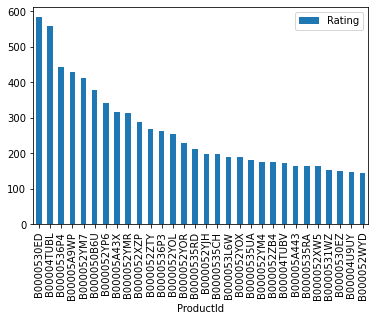

In [433]:
# Visualizing the popular products based on the ratings 
best_ratings.head(30).plot(kind = "bar")

In [434]:
#!pip install scikit-learn

In [435]:
#new_df_rating = df_ratings.drop_duplicates(['UserId', 'ProductId'])

In [436]:
#new_df_rating_pivot = new_df_rating.pivot_table(values = 'Rating', index = 'ProductId', columns = 'UserId').fillna(0)

In [437]:
#new_df_rating_matrix = csr_matrix(new_df_rating_pivot.values)

In [438]:
#import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [439]:
import pandas as pd

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.accuracy import mae
from surprise.accuracy import rmse

from surprise import SVD
from surprise import KNNBasic

In [440]:
#utility matrix(um) to find how much the user appreciates the item
no_duplicate_df = new_ratings.drop_duplicates(['UserId', 'ProductId'])
new_ratings_um = no_duplicate_df.pivot_table(values='Rating', index='ProductId', columns='UserId', fill_value=0)
new_ratings_um.head(10)

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [441]:
new_ratings.size

80000

In [442]:
new_ratings_um.size

26703198

In [443]:
new_ratings_um.shape

(1398, 19101)

In [444]:
#To find the unique items and transpose the matrix
unique_item = new_ratings_um.T
unique_item.head(25)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03454732N8VEYJAMGTTH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [445]:
unique_item.size

26703198

In [446]:
# To check whether the matrix is transposed or not
unique_item.shape

(19101, 1398)

In [447]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [448]:
#To find the factorization of the matrix
SVD = TruncatedSVD(n_components=10)

In [449]:
#evaluating Singular Value Decomposition (SVD) of a matrix to find the factorization of that matrix
factorized_matrix = SVD.fit_transform(unique_item)
factorized_matrix.shape

(19101, 10)

In [450]:
corr_matrix = np.corrcoef(factorized_matrix)
corr_matrix.shape

(19101, 19101)

In [451]:
unique_item.index[86]

'A10GWAQMDTYJRS'

In [452]:
X = 'A10GWAQMDTYJRS'

item_names = list(unique_item.index)
item_names

['A00205921JHJK5X9LNP42',
 'A00473363TJ8YSZ3YAGG9',
 'A01437583CZ7V02UKZQ5S',
 'A020135981U0UNEAE4JV',
 'A024581134CV80ZBLIZTZ',
 'A03056581JJIOL5FSKJY7',
 'A03099101ZRK4K607JVHH',
 'A03454732N8VEYJAMGTTH',
 'A0505229A7NSH3FRXRR4',
 'A05492663T95KW63BR75K',
 'A058255625HJL78EIFBA7',
 'A059547920Q3LZVFHLPI3',
 'A06298653TJ91G7R7MD6R',
 'A065995424G4KBBX1V8BO',
 'A0678500JUN3N7KUG4PS',
 'A07410232KYRFR25CIUGJ',
 'A0800662E1835EJHCQTB',
 'A082796624UNM47DSAI6K',
 'A0864963DOAY7LXGS5I6',
 'A0870685EP51H0X8LFFU',
 'A08962033940N3X8EAXXW',
 'A100AM334XZS3V',
 'A100GYE1W4OXZ8',
 'A100I8A02TXLRU',
 'A100UD67AHFODS',
 'A1016EM9AZDV0Y',
 'A101GN97A47S1P',
 'A101WIXBOMQN07',
 'A10205RFE66H1R',
 'A102866V814SOJ',
 'A1029IITTU8289',
 'A102DX62N4DLNV',
 'A102LFZGD4MJXV',
 'A102OHYDAVD0YK',
 'A102RTTUOMWANH',
 'A102U9TVYZC0DX',
 'A102WZ11EZDIPM',
 'A102ZFBCV9QVOA',
 'A1034GEUA8ZVFR',
 'A103BJIOJSDJL1',
 'A103FNP25GNMPH',
 'A103PIRYKWQKR7',
 'A103QH6R6A4FT1',
 'A103QUZ016BQNJ',
 'A103U3KR4L2ZXT',
 'A1

In [453]:
item_ID = item_names.index(X)
item_ID

86

In [454]:
corr_item_ID = corr_matrix[item_ID]
corr_item_ID.shape

(19101,)

In [471]:
a=list(unique_item.index[corr_item_ID > 0.90])
x=a[0:20]
x

['A020135981U0UNEAE4JV',
 'A0505229A7NSH3FRXRR4',
 'A05492663T95KW63BR75K',
 'A06298653TJ91G7R7MD6R',
 'A101GN97A47S1P',
 'A103FNP25GNMPH',
 'A10BKWPHZPY5A2',
 'A10GWAQMDTYJRS',
 'A10HNUHVRN5HQE',
 'A10ROCQDQJHM08',
 'A116I5HYJ8LXG6',
 'A11B1AGXKHS27L',
 'A11GPI67O0KFCB',
 'A11KOKDIY4SAJW',
 'A11WO857PBPFZI',
 'A11YSZW8CJI006',
 'A127Y2YKKERBNZ',
 'A12NEHTCS1IX97',
 'A12TVY6J6BD161',
 'A12W8NRSYR593I']

In [456]:
#x=new_ratings.drop(['ProductId','UserId','Timestamp'],axis=1)
#y=df_ratings['Rating']
#y=x[:20000]
#y=y.ravel()
#from sklearn.model_selection import train_test_split
 
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=109)
#print(wines[:3])

In [457]:
#from sklearn.svm import SVC
#from sklearn import metrics
#svc=SVC() #Default hyperparameters
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#print('Accuracy Score:')
#print(metrics.accuracy_score(y_test,y_pred))


In [422]:
#K Nearest Neighbours

In [458]:
from scipy.sparse import csr_matrix
new_rating_matrix = csr_matrix(new_ratings_um.values)

from sklearn.neighbors import NearestNeighbors
#estimating cosine similarity to find the similar user
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(new_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [459]:
new_ratings_um

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00005CDRP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDS5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
unique_item                                                    

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [461]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
q_index = np.random.choice(new_ratings_um.shape[0])
dist, ind = model_knn.kneighbors(new_ratings_um.iloc[q_index, :].values.reshape(-19101, 19101), n_neighbors = 6)

for i in range(0, len(dist.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_ratings_um.index[q_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_ratings_um.index[ind.flatten()[i]], dist.flatten()[i]))

Recommendations for B0000532A5:

1: B000052YPM, with distance of 0.779887273418594:
2: B0000530LV, with distance of 0.882866553792919:
3: B000052YQU, with distance of 0.923963320304729:
4: B000052ZEK, with distance of 1.0:
5: B000052ZEO, with distance of 1.0:


In [462]:
from sklearn.model_selection import train_test_split
y = pd.to_numeric(new_ratings['Rating'], downcast='float')
y.values
timestamp = pd.to_numeric(new_ratings['Timestamp'], downcast='float')
timestamp

# new_ratings['ProductId'] = new_ratings['ProductId'].astype(float)


0        1.369699e+09
1        1.355443e+09
2        1.404691e+09
3        1.382573e+09
4        1.274227e+09
             ...     
19995    1.168301e+09
19996    1.142467e+09
19997    1.139270e+09
19998    1.096848e+09
19999    1.100909e+09
Name: Timestamp, Length: 20000, dtype: float32

In [463]:

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(timestamp, y, test_size=0.4,random_state=109)


In [464]:
X_train = X_train.values
X = X_train.reshape(-1, 1)
X_test = X_test.values
y_train = y_train.values
y = y_train.reshape(-1, 1)
y_test = y_test.values

In [465]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import collections

In [466]:
classifiers = {
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
}

In [392]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X , y)
    acc_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy score of", round(acc_score.mean(), 2), "accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy score percentage of", round(acc_score.mean(), 2) * 100, " % accuracy percentage")

<ipython-input-392-c6ff6f3167eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X , y)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed whe

Classifiers:  KNeighborsClassifier Has a accuracy score of 0.53 accuracy score
Classifiers:  KNeighborsClassifier Has a accuracy score percentage of 53.0  % accuracy percentage


/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Classifiers:  SVC Has a accuracy score of 0.64 accuracy score
Classifiers:  SVC Has a accuracy score percentage of 64.0  % accuracy percentage


In [ ]:
#from sklearn.svm import SVC
#from sklearn import metrics
# svm=SVM() #Default hyperparameters
# svm.fit(X_train,y_train)
# y_pred=svc.predict(X_test)
# print('Accuracy Score:')
# print(metrics.accuracy_score(y_test,y_pred))